In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Overview

Our dataset for this project is a collection of all domestic flights in the United States from the year 2008. It contains a little over 7 million flights with 29 columns describing the date, time, flight time, carrier, locations, and delay time. Our  dataset has been provided from the Bureau of Transportation Statistics. What we want to do here is predict the total delay time based on the other columns in our dataset, and determine if a flight will be over 30 minutes late. In order to do that, the most practical model in our toolset for this task is a binary logistic model, a predictive model that will evaluate the correlatiob between our columns and the likelihood that the flight will be late. 

Note that a limitation of this model is that it will not determine how late each flight will be.

In [2]:
# Grab and process the raw data.
flights = pd.read_csv('data\\flights_2008.csv')

# Preview our dataset
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [3]:
# Prints the size of our dataset
flights.shape

(7009728, 29)

In [4]:
# Print our data types
flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [5]:
# Quick summary of our data
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [6]:
# Print out the number of unique columns in our categorical variables
categorical = flights.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

UniqueCarrier
20
TailNum
5373
Origin
303
Dest
304
CancellationCode
4


# Data Cleaning

Our dataset has a few important issues that will need to be addressed before we construct our model. 
1. All of our observations are from the same year, so we don't need the year column. This would be useful if our objective is determining airline arrivals over an extended period of time.
2. We have multiple NaN values in our cancellation, and delay columns. Since NaN in this instance most likely indicates that this value was not used, we will be replacing them with 0s.
3. On the topic of delays, we are only interested in the total amount of time delayed, so we will be combining all five of our delay columns into one, and placing it in a series of its own as our target variable.
4. Our categorical variables, Unique carrier, tail number, origin, and destination could be converted to dummy variables, but due to the number of unique values as seen above, it would introduce a very large number of features to our model. Eliminating them, and focusing on our numerical columns will provide us a much faster result.

In [7]:
# Create the target variable, total delay from all delay columns
Y = flights.iloc[:,24:].sum(axis=1)

# Removing year, categorical variables, and delay data from original data
flights.drop(flights.columns[[range(24,29)]], axis=1, inplace=True)
flights.drop(['Year', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'], axis=1, inplace=True)

# Replace all instances of NaN with 0
flights = flights.fillna(0)

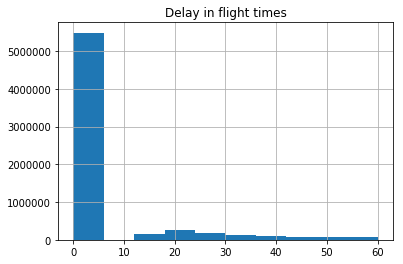

In [8]:
Y.hist(range=(0,60))
plt.title('Delay in flight times')
plt.show()

In [9]:
Y.describe()

count    7.009728e+06
mean     1.235968e+01
std      3.550083e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.461000e+03
dtype: float64

In [10]:
# Downsampling our dataframe so it runs quickly
X = flights.sample(frac=0.01, replace=True)
y = Y.sample(frac=0.01, replace=True)

In [11]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression Model

In [12]:
# Modify delay data so that 30 minutes or less is 0,
# more than 30 minutes is 1
y = np.where(y > 30, 1, 0)

In [13]:
# Constructing our logistic regression model
lr = LogisticRegression(C = 1e9)
fit = lr.fit(X, y)

print('\nCoefficients: \n', fit.coef_)
print('\nIntercept: \n', fit.intercept_)
print('\nR-squared:')
print(fit.score(X, y))
pred_y_sklearn = lr.predict(X)


Coefficients: 
 [[-2.57644947e-02 -9.50606809e-03 -1.52226844e-02  4.58232923e-05
  -2.08258608e-04 -5.80295804e-05 -1.22413027e-04 -3.41016038e-05
  -1.49391605e-03 -1.04694632e-02  2.12651011e-03  1.97592198e-03
  -1.63148917e-03  1.05497528e-03 -7.50050177e-03  4.75035518e-04
   4.99476992e-03 -4.62674917e-04]]

Intercept: 
 [-0.36111648]

R-squared:
0.8708218611352839


In [14]:
# Constructing our logistic regression model
lr = LogisticRegression(C = 1e9)

cross_val_score(lr, X_train, y_train, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.76860663, 0.77769886, 0.78288399, 0.78743068, 0.79016292])

In [ ]:
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

confusion_matrix(y_test, lr_pred)

In [ ]:
b = X.SelectKBest(f_classif, k=10)
X_train = b.fit_transform(X_train, y_train)

# Source

Flight Data
http://stat-computing.org/dataexpo/2009/the-data.html 